In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline
from sklearn import preprocessing 
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
#reading the dataset
df_train = pd.read_excel('Data_Train.xlsx')
df_test = pd.read_excel('Data_Test.xlsx')

In [2]:
df_train.shape

(6019, 12)

In [3]:
df_test.shape

(1234, 11)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [6]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
df_train.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [8]:
df_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [9]:
df_test.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [10]:
df_train['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [11]:
df_train['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [12]:
df_train['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
df_train['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [14]:
df_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [15]:
df_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [16]:
# Mark Missing Values
#For Train Data
df_train['Mileage'].replace(0.00, np.nan, inplace= True) #As Milage can't be 0.00
#For Train Data
df_test['Mileage'].replace(0.00, np.nan, inplace= True) #As Milage can't be 0.00

In [17]:
#Imputing missing value for seats
df_train['Seats'].fillna(int(df_train['Seats'].mean()), inplace=True)
df_test['Seats'].fillna(int(df_test['Seats'].mean()), inplace=True)

Conversion required for below features:
1. Engine -Its continous, need to remove CC, convert to int64
2. Power - Its continous, need to remove bhp, convert to float64
3. Seats - Its numercial and discrete, convert to int64
4. Year- As Year is categorical variable in this context

In [18]:
#Converting Mileage to Float
df_train['Mileage'] = df_train['Mileage'].str[:-5].replace(np.nan, -1).astype('float').replace(-1, np.nan)
df_test['Mileage'] = df_test['Mileage'].str[:-5].replace(np.nan, -1).astype('float').replace(-1, np.nan)

In [19]:
#Converting Engine to Integer
df_train['Engine'] = df_train['Engine'].str[:-3].replace(np.nan, -1).astype('int').replace(-1, np.nan)
df_test['Engine'] = df_test['Engine'].str[:-3].replace(np.nan, -1).astype('int').replace(-1, np.nan)

In [20]:
#Converting Power to Float
df_train['Power'] = df_train['Power'].str[:-4].replace(np.nan, -1).replace('null', -1).astype('float').replace(-1, np.nan)
df_test['Power'] = df_test['Power'].str[:-4].replace(np.nan, -1).replace('null', -1).astype('float').replace(-1, np.nan)

In [21]:
#Converting Seats to Integer
df_train['Seats'] = df_train['Seats'].astype('int')
df_test['Seats'] = df_test['Seats'].astype('int')

In [22]:
#Converting Year to object
df_train['Year']=df_train['Year'].astype(object) #As Year is categorical variable in this context
df_test['Year']=df_test['Year'].astype(object)

In [23]:
#Imputing missing data in Engine
df_train['Engine'].fillna(int(df_train['Engine'].mean()), inplace=True)
df_test['Engine'].fillna(int(df_test['Engine'].mean()), inplace=True)

In [24]:
#Imputing missing data in Power
df_train['Power'].fillna(df_train['Power'].mean(), inplace=True)
df_test['Power'].fillna(df_test['Power'].mean(), inplace=True)

# Data Visvualization

In [25]:
sns.set(rc={'figure.figsize':(10,5)}) 

In [26]:
data_continous = df_train[['Kilometers_Driven','Mileage','Engine','Power','Price']]

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

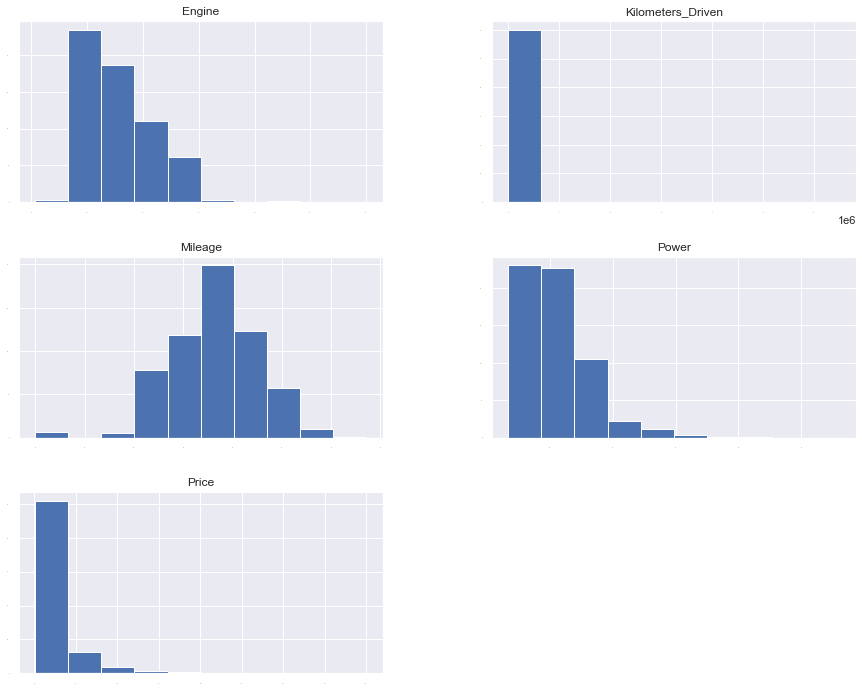

In [27]:
# to plot histograms (to check distribution of variables) of all the variables in a dataframe
ax=data_continous.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(15,12))
plt.show()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

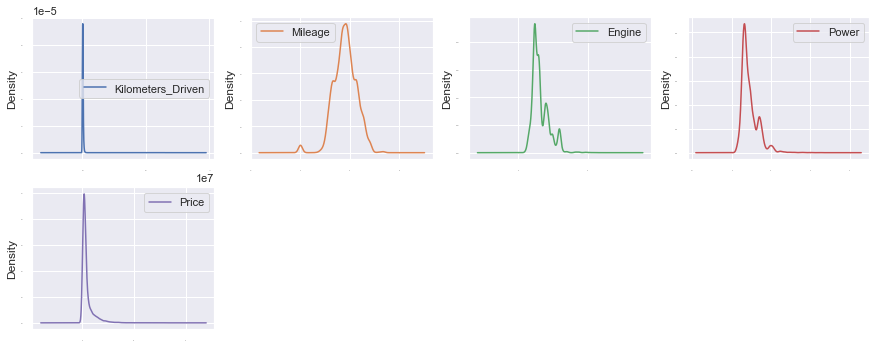

In [28]:
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

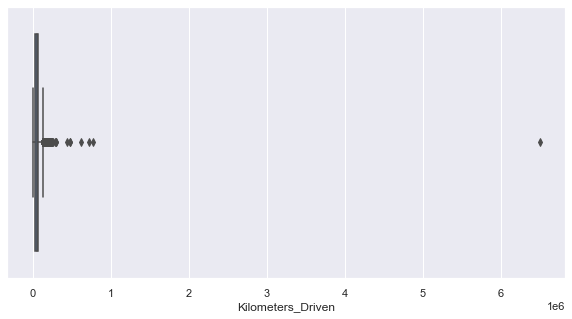

In [29]:
sns.boxplot(x='Kilometers_Driven',data=df_train)

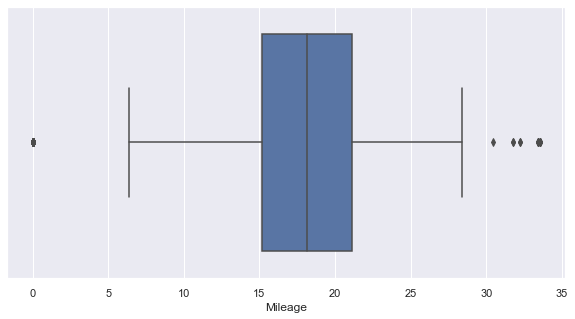

In [30]:
sns.boxplot(x='Mileage',data=df_train)

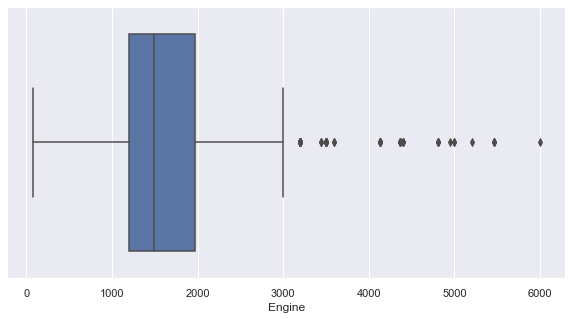

In [31]:
sns.boxplot(x='Engine',data=df_train)

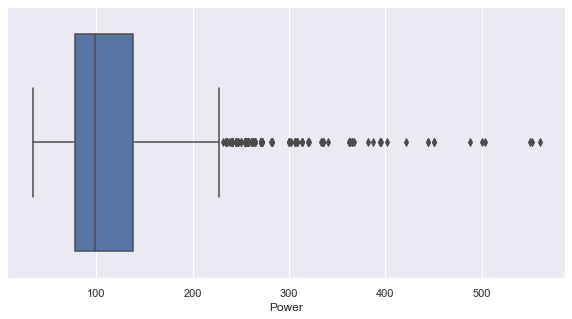

In [32]:
sns.boxplot(x='Power',data=df_train)

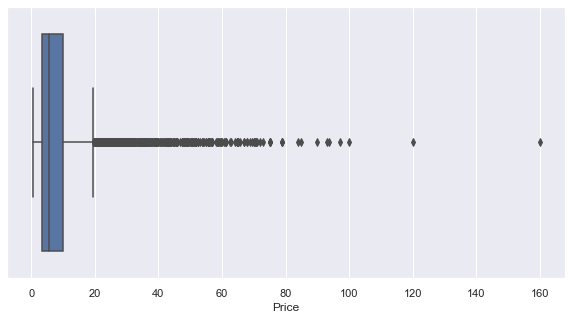

In [33]:
sns.boxplot(x='Price',data=df_train)

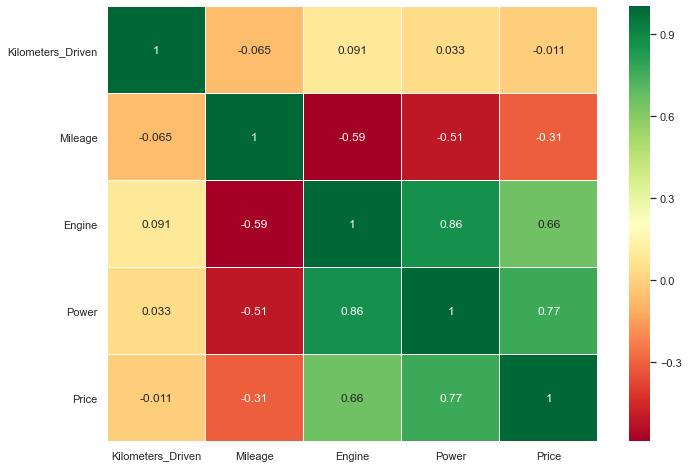

In [34]:
#Heat map of all continuous variables, ignored the categorical variables
data_continous_temp = data_continous.copy()
data_continous_temp['Price'] = df_train.Price
ax = sns.heatmap(data_continous_temp.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
bottom, top = ax.get_ylim()
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()

C:\Users\KIIT\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\KIIT\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


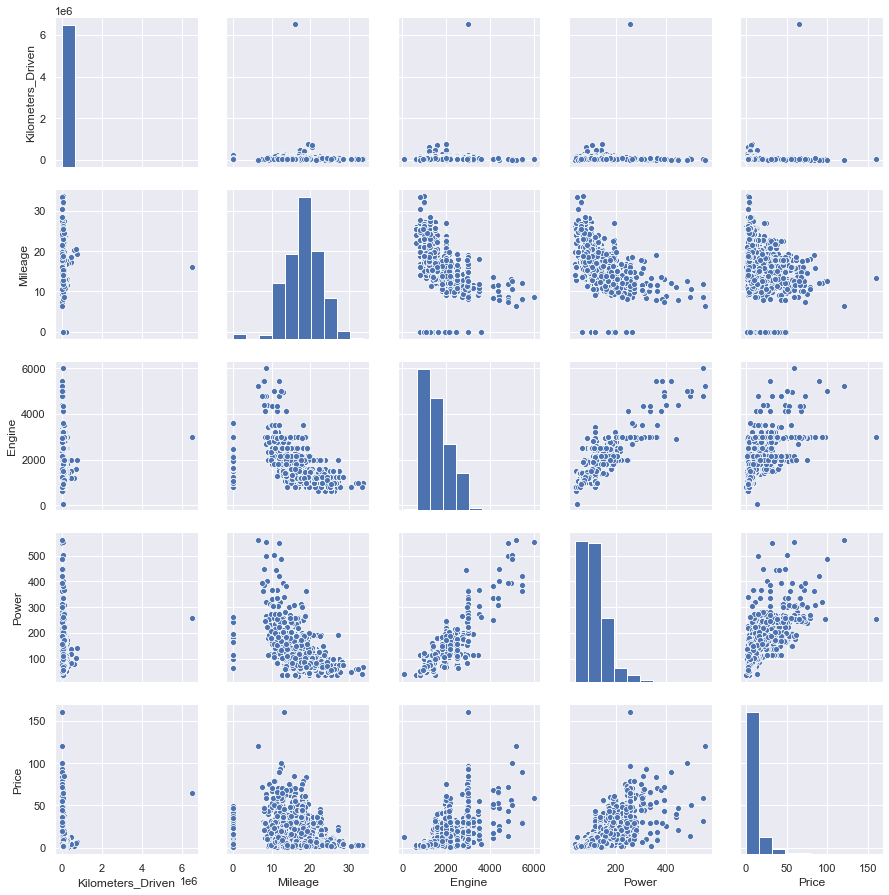

In [35]:
# Scatter plot matrix using seaborn library
sns.pairplot(data_continous)
plt.show()

In [36]:
data_categorical = df_train[['Name','Location','Year','Fuel_Type','Transmission','Owner_Type']]

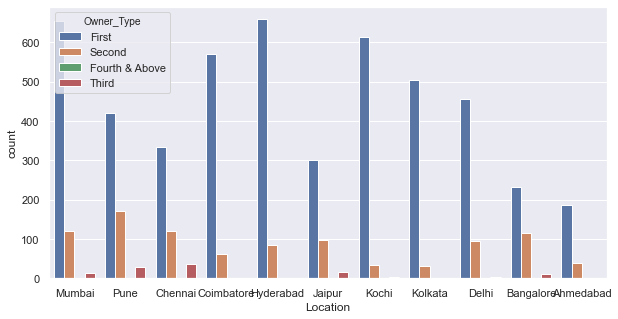

In [37]:
sns.countplot(x = data_categorical.Location, hue = data_categorical.Owner_Type)
plt.show()

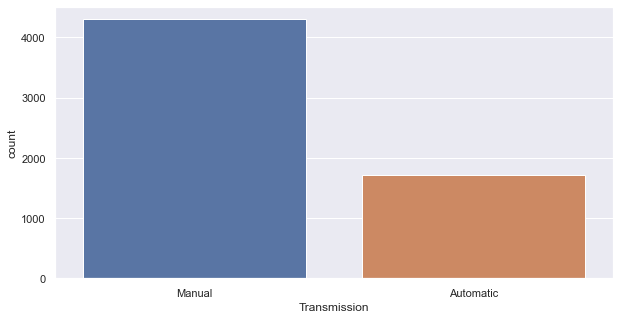

In [38]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x = data_categorical.Transmission)
plt.show()

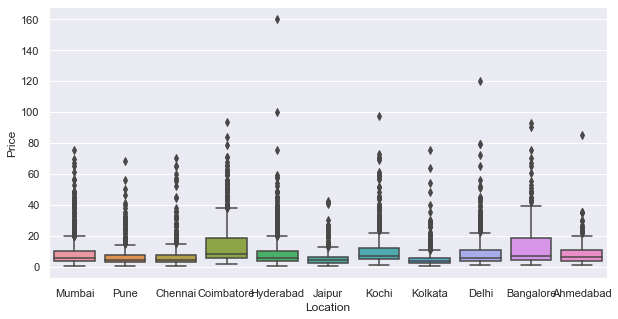

In [39]:
sns.boxplot(x = data_categorical.Location, y = data_continous_temp.Price)
plt.show()

In [40]:
df_test_predicted=df_test.copy()
#copying the dataset df_test to df_test_predicted and working on df_test_predicted so that df_test can be saved for future use.

In [41]:
df_test_predicted.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5


##### Diving the name coloumn to 3 subparts- Brand, Model and Version:

In [42]:
#Converting Name coloumn to a list and making ammends
list_of_names = df_train['Name'].to_list()
print('List of Names: ', list_of_names)

List of Names:  ['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option', 'Honda Jazz V', 'Maruti Ertiga VDI', 'Audi A4 New 2.0 TDI Multitronic', 'Hyundai EON LPG Era Plus Option', 'Nissan Micra Diesel XV', 'Toyota Innova Crysta 2.8 GX AT 8S', 'Volkswagen Vento Diesel Comfortline', 'Tata Indica Vista Quadrajet LS', 'Maruti Ciaz Zeta', 'Honda City 1.5 V AT Sunroof', 'Maruti Swift VDI BSIV', 'Land Rover Range Rover 2.2L Pure', 'Land Rover Freelander 2 TD4 SE', 'Mitsubishi Pajero Sport 4X4', 'Honda Amaze S i-Dtech', 'Maruti Swift DDiS VDI', 'Renault Duster 85PS Diesel RxL Plus', 'Mercedes-Benz New C-Class C 220 CDI BE Avantgare', 'BMW 3 Series 320d', 'Maruti S Cross DDiS 200 Alpha', 'Audi A6 2011-2015 35 TFSI Technology', 'Hyundai i20 1.2 Magna', 'Volkswagen Vento Petrol Highline AT', 'Honda City Corporate Edition', 'Nissan Micra Diesel XV', 'Maruti Alto K10 2010-2014 VXI', 'Honda WRV i-VTEC VX', 'Toyota Innova 2.5 V Diesel 7-seater', 'Renault Duster 110PS Diesel RxZ Pack', 'Toyota C

In [43]:
#Converting Name coloumn to a list and making ammends
list_of_names_test = df_test['Name'].to_list()
print('List of Names: ', list_of_names_test)

List of Names:  ['Maruti Alto K10 LXI CNG', 'Maruti Alto 800 2016-2019 LXI', 'Toyota Innova Crysta Touring Sport 2.4 MT', 'Toyota Etios Liva GD', 'Hyundai i20 Magna', 'Mahindra XUV500 W8 2WD', 'Toyota Fortuner 4x2 AT TRD Sportivo', 'Hyundai EON Era Plus', 'Honda City 1.5 S MT', 'Mahindra XUV500 W6 2WD', 'Audi Q5 2008-2012 2.0 TDI', 'Hyundai Grand i10 Magna', 'Toyota Corolla H5', 'Maruti Swift Vdi BSIII', 'Nissan Terrano XL', 'BMW X1 sDrive20d', 'BMW 3 Series GT 320d Luxury Line', 'Ford Ikon 1.4 TDCi DuraTorq', 'Maruti Swift AMT ZXI', 'Maruti Swift Dzire VXi', 'Maruti Ritz LDi', 'Nissan Micra XV', 'Maruti Alto 800 2016-2019 LXI', 'Skoda Laura 1.8 TSI Ambition', 'Honda Civic 2010-2013 1.8 S MT Inspire', 'Ford Ikon 1.3 Flair', 'Maruti Alto LX', 'Honda Jazz 1.5 V i DTEC', 'Skoda Rapid 1.5 TDI AT Ambition', 'Hyundai i20 1.2 Sportz', 'Toyota Etios Cross 1.4L VD', 'Volkswagen Polo GT TDI', 'Hyundai i10 Era 1.1 iTech SE', 'Mitsubishi Pajero 2.8 SFX', 'Maruti Swift Dzire Tour LDI', 'Maruti Swif

In [44]:
list_of_names = [w.replace('Land Rover', 'Land-Rover') for w in list_of_names]
list_of_names_test = [w.replace('Land Rover', 'Land-Rover') for w in list_of_names_test]

In [45]:
list_of_names = [w.replace('Range Rover', 'Range-Rover') for w in list_of_names]
list_of_names_test = [w.replace('Range Rover', 'Range-Rover') for w in list_of_names_test]

In [46]:
list_of_names = [w.replace('1 Series', '1-Series') for w in list_of_names]
list_of_names_test = [w.replace('1 Series', '1-Series') for w in list_of_names_test]

In [47]:
list_of_names = [w.replace('3 Series', '3-Series') for w in list_of_names]
list_of_names_test = [w.replace('3 Series', '3-Series') for w in list_of_names_test]

In [48]:
list_of_names = [w.replace('5 Series', '5-Series') for w in list_of_names]
list_of_names_test = [w.replace('5 Series', '5-Series') for w in list_of_names_test]

In [49]:
list_of_names = [w.replace('6 Series', '6-Series') for w in list_of_names]
list_of_names_test = [w.replace('6 Series', '6-Series') for w in list_of_names_test]

In [50]:
list_of_names = [w.replace('7 Series', '7-Series') for w in list_of_names]
list_of_names_test = [w.replace('7 Series', '7-Series') for w in list_of_names_test]

In [51]:
list_of_names = [w.replace('Jeep Compass', 'Jeep-Compass') for w in list_of_names]
list_of_names_test = [w.replace('Jeep Compass', 'Jeep-Compass') for w in list_of_names_test]

In [52]:
list_of_names = [w.replace('S Cross', 'S-Cross') for w in list_of_names]
list_of_names_test = [w.replace('S Cross', 'S-Cross') for w in list_of_names_test]

In [53]:
list_of_names = [w.replace('New C-Class', 'C-Class') for w in list_of_names]
list_of_names_teat = [w.replace('New C-Class', 'C-Class') for w in list_of_names_test]

In [54]:
df_train['Name'] = list_of_names
df_test['Name'] = list_of_names_test

In [55]:
#Making 3 new coloumn by splitting the Name and dropping the Name coloumn in train dataset
new = df_train['Name'].str.split(" ", n = 2, expand = True) 
df_train["Brand"]= new[0] 
df_train["Model"]= new[1] 
df_train["Version"]= new[2] 
df_train.drop(columns =["Name"], inplace = True)

#Making 3 new coloumn by splitting the Name and dropping the Name coloumn in test dataset
newtest = df_test['Name'].str.split(" ", n = 2, expand = True) 
df_test["Brand"]= newtest[0] 
df_test["Model"]= newtest[1] 
df_test["Version"]= newtest[2] 
df_test.drop(columns =["Name"], inplace = True)

In [56]:
df_train.head(20)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Version
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,Audi,A4,New 2.0 TDI Multitronic
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5,2.35,Hyundai,EON,LPG Era Plus Option
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5,3.50,Nissan,Micra,Diesel XV
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8,17.50,Toyota,Innova,Crysta 2.8 GX AT 8S
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5,5.20,Volkswagen,Vento,Diesel Comfortline
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5,1.95,Tata,Indica,Vista Quadrajet LS


In [57]:
df_test.head(20)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Version
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4,Maruti,Alto,K10 LXI CNG
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5,Maruti,Alto,800 2016-2019 LXI
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7,Toyota,Innova,Crysta Touring Sport 2.4 MT
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5,Toyota,Etios,Liva GD
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5,Hyundai,i20,Magna
5,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00000,7,Mahindra,XUV500,W8 2WD
6,Pune,2015,59000,Diesel,Automatic,First,12.55,2982.0,168.70000,7,Toyota,Fortuner,4x2 AT TRD Sportivo
7,Jaipur,2013,65000,Petrol,Manual,First,21.10,814.0,55.20000,5,Hyundai,EON,Era Plus
8,Mumbai,2011,66000,Petrol,Manual,Second,17.00,1497.0,118.00000,5,Honda,City,1.5 S MT
9,Coimbatore,2015,54684,Diesel,Manual,First,15.10,2179.0,140.00000,7,Mahindra,XUV500,W6 2WD


## Frequency Plots

Inspecting the frequency of the different categorical variables to get a better understanding of their distribution and potentially drop some points that may act as outliers/anomalies.

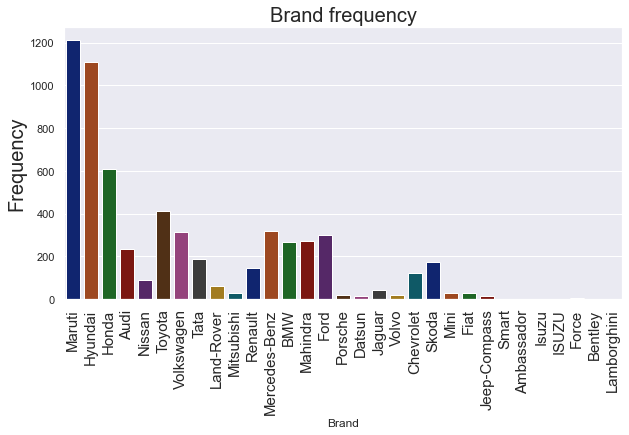

In [58]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(df_train['Brand'],palette = 'dark')
plt.title('Brand frequency',fontsize = 20)
plt.ylabel('Frequency' , fontsize = 20)
plt.xticks(rotation=90, fontsize = 15)
plt.show()

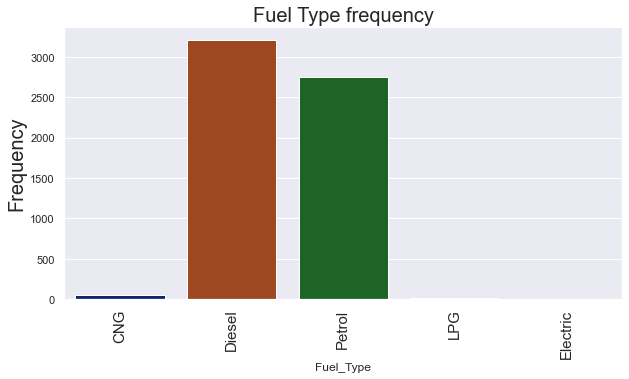

In [59]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(df_train['Fuel_Type'],palette = 'dark')
plt.title('Fuel Type frequency',fontsize = 20)
plt.ylabel('Frequency' , fontsize = 20)
plt.xticks(rotation=90 , fontsize = 15)
plt.show()

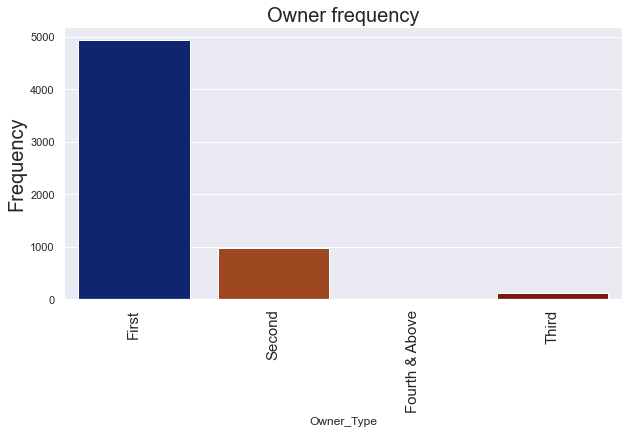

In [60]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(df_train['Owner_Type'],palette = 'dark')
plt.title('Owner frequency',fontsize = 20)
plt.ylabel('Frequency' , fontsize = 20)
plt.xticks(rotation=90 , fontsize = 15)
plt.show()

In [61]:
#Dropping datasets where owner type is 4 and above and where fuel type is electricity
df_train = df_train[df_train['Owner_Type']  != 'Fourth & Above']
df_train = df_train[df_train['Fuel_Type']  != 'Electric']

In [62]:
#preparing data for plotting
yearly_price = df_train.groupby(['Year'])['Price'].mean().reset_index()
sem_price = df_train.groupby(['Year'])['Price'].sem().reset_index()

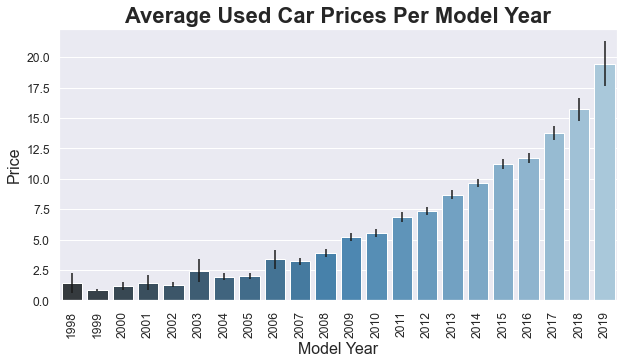

In [63]:
sns.set_style("ticks", {"xtick.major.size": 16, "ytick.major.size":8});
sns.set(font_scale=1.1)
fig = sns.barplot(x=yearly_price['Year'].astype(int),y= yearly_price['Price'], yerr=sem_price['Price'],capsize=4,errwidth=3,palette="Blues_d")
plt.ylabel('Price',fontsize=16);
plt.xlabel('Model Year',fontsize=16);
plt.xticks(rotation=90)
plt.title('Average Used Car Prices Per Model Year',fontsize=22,fontweight='bold');
#sns.savefig("Average Used Car Price Per Year.png")
plt.savefig('pricect.png', dpi=400)

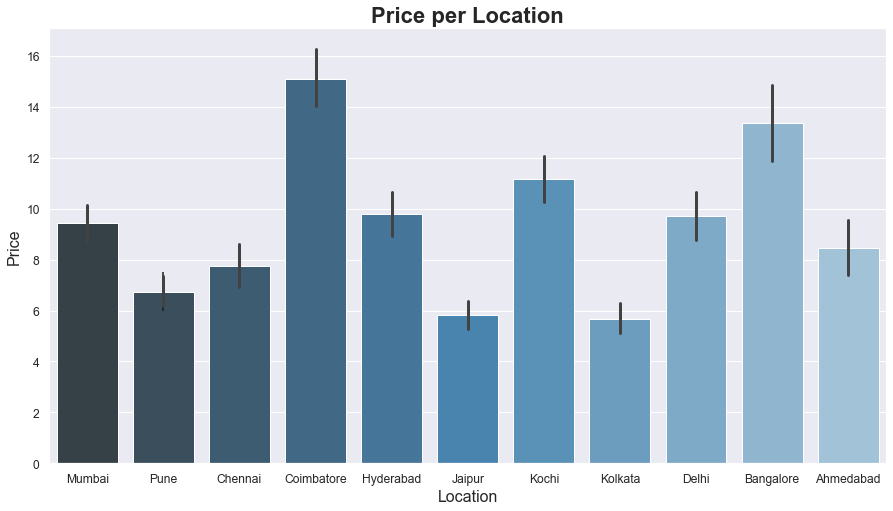

In [64]:
sem_price = df_train.groupby(['Location'])['Price'].sem().reset_index()
plt.figure(figsize=(15, 8));
sns.set_style("ticks", {"xtick.major.size": 16, "ytick.major.size":8});
sns.set(font_scale=1.1)
fig = sns.barplot(x=df_train['Location'],y= df_train['Price'],yerr=sem_price['Price'],errwidth=3,palette="Blues_d")
plt.ylabel('Price',fontsize=16);
plt.xlabel('Location',fontsize=16);
plt.xticks()
plt.title('Price per Location',fontsize=22,fontweight='bold');

In [65]:
#Removing the data points where the car is more than 15 years old and the number of seats range between 0 and 10
df_train = df_train[(df_train["Year"].between(2004, 2020, inclusive=True)) & (df_train["Seats"].between(1, 10, inclusive=True))]

##### Using One-Hot encoding for categorical variable

In [66]:
df_train['Location'] = pd.get_dummies(df_train['Location'], prefix='Location')
df_test['Location'] = pd.get_dummies(df_test['Location'], prefix='Location')

In [67]:
df_train['Year'] = pd.get_dummies(df_train['Year'], prefix='Year')
df_test['Year'] = pd.get_dummies(df_test['Year'], prefix='Year')

In [68]:
df_train['Fuel_Type'] = pd.get_dummies(df_train['Fuel_Type'], prefix='Fuel')
df_test['Fuel_Type'] = pd.get_dummies(df_test['Fuel_Type'], prefix='Fuel')

In [69]:
df_train['Transmission'] = pd.get_dummies(df_train['Transmission'], prefix='Transmission')
df_test['Transmission'] = pd.get_dummies(df_test['Transmission'], prefix='Transmission')

In [70]:
df_train['Owner_Type'] = pd.get_dummies(df_train['Owner_Type'], prefix='OwnerType')
df_test['Owner_Type'] = pd.get_dummies(df_test['Owner_Type'], prefix='OwnerType')

In [71]:
df_train['Brand'] = pd.get_dummies(df_train['Brand'], prefix='Brand')
df_test['Brand'] = pd.get_dummies(df_test['Brand'], prefix='Brand')

In [72]:
df_train['Model'] = pd.get_dummies(df_train['Model'], prefix='Model')
df_test['Model'] = pd.get_dummies(df_test['Model'], prefix='Model')

In [73]:
df_train['Version'] = pd.get_dummies(df_train['Version'], prefix='Version')
df_test['Version'] = pd.get_dummies(df_test['Version'], prefix='Version')

### Removing Ouliers or Anomalies

In [74]:
#Remove Outliers from  'Kilometers_Driven','Power','Engine','Mileage'
Q1 = data_continous.quantile(0.25)
Q2 = data_continous.quantile(0.5)
Q3 = data_continous.quantile(0.75)

IQR = Q3-Q1
Min = Q1-(1.5*IQR)
Max = Q3+(1.5*IQR)

print("IQR : ",IQR)
print("")
print("Min : ",Min)
print("")
print("Q1 : ",Q1)
print("")
print("Q2 : ",Q2)
print("")
print("Q3 : ",Q3)
print("")
print("Max : ",Max)

IQR :  Kilometers_Driven    39000.00
Mileage                  5.93
Engine                 771.00
Power                   60.03
Price                    6.45
dtype: float64

Min :  Kilometers_Driven   -24500.000
Mileage                  6.275
Engine                  41.500
Power                  -12.045
Price                   -6.175
dtype: float64

Q1 :  Kilometers_Driven    34000.00
Mileage                 15.17
Engine                1198.00
Power                   78.00
Price                    3.50
Name: 0.25, dtype: float64

Q2 :  Kilometers_Driven    53000.00
Mileage                 18.15
Engine                1493.00
Power                   98.60
Price                    5.64
Name: 0.5, dtype: float64

Q3 :  Kilometers_Driven    73000.00
Mileage                 21.10
Engine                1969.00
Power                  138.03
Price                    9.95
Name: 0.75, dtype: float64

Max :  Kilometers_Driven    131500.000
Mileage                  29.995
Engine                 3125

In [75]:
#Remove Outliers
df_train = df_train[~((df_train[['Kilometers_Driven','Power','Engine','Mileage']] < Min) | 
                      (df_train[['Kilometers_Driven','Power','Engine','Mileage']] > Max)).any(axis=1)]

In [76]:
#Check shape after removal of outliers
df_train.shape

(5443, 14)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

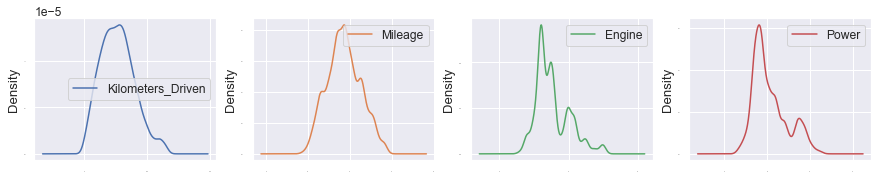

In [77]:
#Density Plot post outlier removal
data_continous = df_train[['Kilometers_Driven','Mileage','Engine','Power']]
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

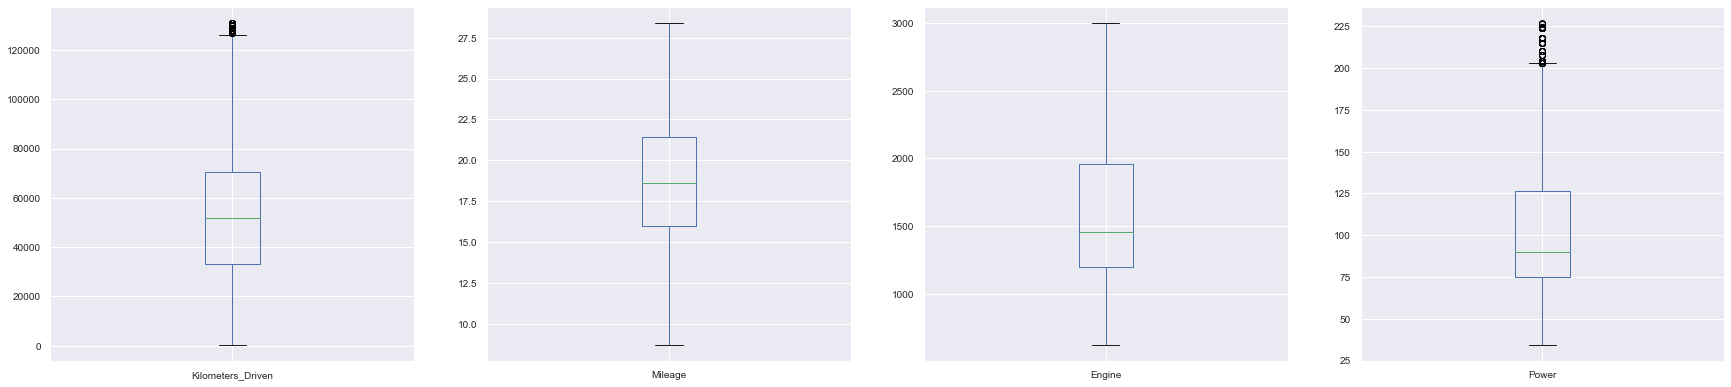

In [78]:
#Box_Plot post outlier removal
data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


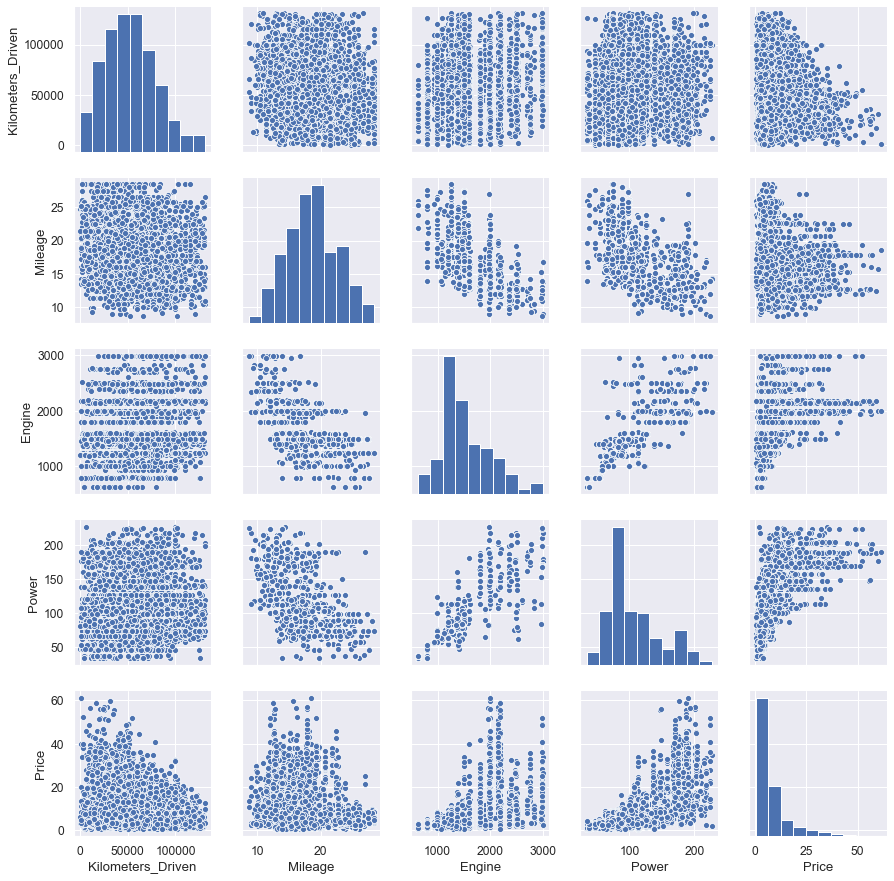

In [79]:
# Scatter plot matrix using seaborn library post outlier removal
data_continous['Price']=df_train.Price
sns.pairplot(data_continous)
plt.show()

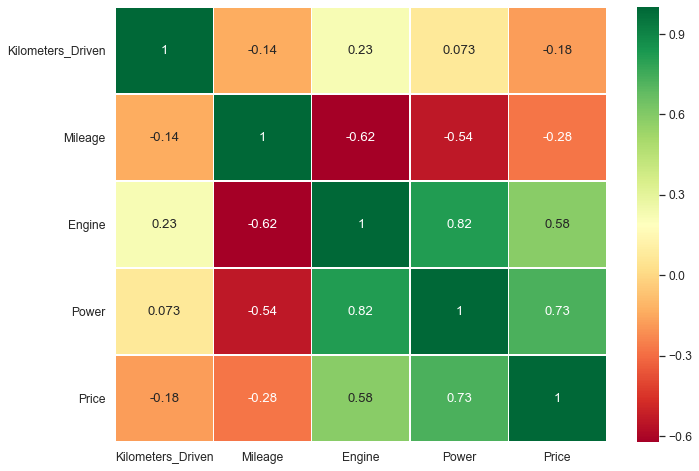

In [80]:
sns.heatmap(data_continous.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()

After outlier removal, The data visvualization indicates, Engine (0.58) and Power (0.73) are moderalely corelated to Price

In [81]:
df_train.drop(df_train[df_train['Price'] > 100].index, inplace = True) 

In [82]:
df_train.shape

(5443, 14)

In [83]:
#Scaling the dataset
scaler = StandardScaler() 
scaler.fit(df_train) #scaling train dataset

scaler.fit(df_test) #scaling test dataset

StandardScaler(copy=True, with_mean=True, with_std=True)

## Modeling

In [84]:
df = df_train.drop(['Price'], axis = 1)

In [85]:
train_x = df
train_y = df_train[['Price']]

In [86]:
train_x.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand', 'Model',
       'Version'],
      dtype='object')

In [87]:
train_y.columns

Index(['Price'], dtype='object')

In [88]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)

###  DecisionTreeRegressor 

In [89]:
dt = DecisionTreeRegressor()
dt.fit(X_train,  Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [90]:
Y_train_pred = dt.predict(X_train)
Y_test_pred = dt.predict(X_test)

train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
test_RMSE=np.sqrt(mean_squared_error(Y_test,Y_test_pred))
print('DecisionTreeRegressor Train RMSE: ', train_RMSE)
print('DecisionTreeRegressor Test RMSE: ', test_RMSE)
print('Score for Train Data: ', dt.score(X_train,Y_train))
print('Score for Validation Data: ', dt.score(X_test,Y_test))

DecisionTreeRegressor Train RMSE:  0.29658964171571023
DecisionTreeRegressor Test RMSE:  4.649938731332264
Score for Train Data:  0.9986226869856293
Score for Validation Data:  0.6656509719047847


In [91]:
#Using K-Fold Cross Validation
scoredt = cross_val_score(dt, train_x, train_y, cv=KFold(n_splits=10))
scoredt

array([0.74429863, 0.76226619, 0.66274806, 0.77367657, 0.72611653,
       0.62984624, 0.69791043, 0.68896602, 0.67646662, 0.69726321])

In [92]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scoredt.mean(), scoredt.std() * 2))

Accuracy: 0.71 (+/- 0.09)


### RandomForestRegressor

#### RandomForestRegressor without any hyperparameters, i.e Default paramters

In [93]:
#using random forest for training
rf = RandomForestRegressor()
rf.fit(X_train,  Y_train)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [94]:
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
test_RMSE=np.sqrt(mean_squared_error(Y_test,Y_test_pred))
print('RandomForestRegressor Train RMSE: ', train_RMSE)
print('RandomForestRegressor Test RMSE: ', test_RMSE)
print('Score for Train Data: ', rf.score(X_train,Y_train))
print('Score for Validation Data: ', rf.score(X_test,Y_test))

RandomForestRegressor Train RMSE:  1.432902065193977
RandomForestRegressor Test RMSE:  3.542908322386814
Score for Train Data:  0.967852018505815
Score for Validation Data:  0.8059000457580779


Text(0, 0.5, 'Predictions')

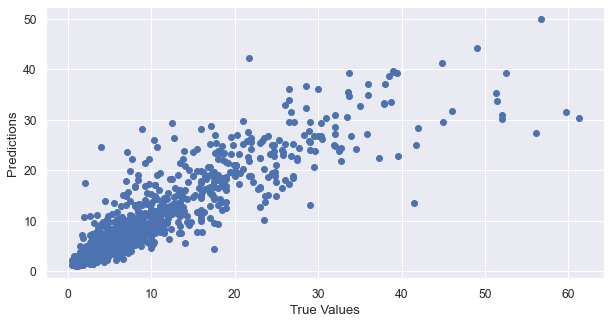

In [95]:
## The line / model
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [96]:
#Using K-Fold Cross Validation
scorerf = cross_val_score(rf, train_x, train_y, cv=KFold(n_splits=10))
scorerf

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

array([0.86650206, 0.83924377, 0.79519753, 0.8760321 , 0.84256057,
       0.77654993, 0.84058348, 0.79832448, 0.80985813, 0.84614424])

In [97]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scorerf.mean(), scorerf.std() * 2))

Accuracy: 0.83 (+/- 0.06)


#### RandomForestRegressor with hyperparameters

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


##### We have used RandomisedSearCV and GridSearchCV to search for the best hyper parameters. Since The code for searching for best hyper parameters take longer time to run, hence It has been marked as Raw NB Convert so that it takes less time to run the notebook and the corresponding outputs have been stated below for better understanding.


###### Code for using the random grid to search for best hyperparameters

Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search

Now that we know the best hyperparameters, we tune our model according to it to get best results:

In [99]:
reg = RandomForestRegressor(n_estimators=800,min_samples_split=2,max_features='sqrt',max_depth=130,min_samples_leaf=1)
reg.fit(X_train,  Y_train)

#reg_temp = cp.deepcopy(reg) #After all analysis, this turns out to be the model with highest accuracy, hence keeping a copy of it

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=130,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [100]:
Y_train_pred = reg.predict(X_train)
Y_val_pred = reg.predict(X_test)

train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
val_RMSE=np.sqrt(mean_squared_error(Y_test,Y_val_pred))
print('RandomForestRegressor Train RMSE: ', train_RMSE)
print('RandomForestRegressor Validation RMSE: ', val_RMSE)
print('Score for Train Data: ', reg.score(X_train,Y_train))
print('Score for Validation Data: ', reg.score(X_test,Y_test))

RandomForestRegressor Train RMSE:  1.1650975531852807
RandomForestRegressor Validation RMSE:  3.3008095741110326
Score for Train Data:  0.9787457750455694
Score for Validation Data:  0.8315207018696456


In [101]:
scoresafterhpt = cross_val_score(reg, train_x, train_y, cv=KFold(n_splits=10))
scoresafterhpt

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

array([0.86998734, 0.85096851, 0.85293823, 0.89332985, 0.89277977,
       0.79852457, 0.8644322 , 0.83449351, 0.82810578, 0.87283001])

In [102]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresafterhpt.mean(), scoresafterhpt.std() * 2))

Accuracy: 0.86 (+/- 0.06)


We get an accuracy of 86% which is better than RandomForestRegressor with default hyperparameters

### Linear Regression

In [103]:
lin= LinearRegression()
lin.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
Y_train_pred = lin.predict(X_train)
Y_test_pred = lin.predict(X_test)

In [105]:
train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
test_RMSE=np.sqrt(mean_squared_error(Y_test,Y_test_pred))
print('LinearRegression Train RMSE: ', train_RMSE)
print('LinearRegression Test RMSE: ', test_RMSE)
print('Score for Train Data: ', lin.score(X_train,Y_train))
print('Score for Validation Data: ', lin.score(X_test,Y_test))

LinearRegression Train RMSE:  4.736934652680881
LinearRegression Test RMSE:  4.927715494049079
Score for Train Data:  0.6486698027317179
Score for Validation Data:  0.6245113145513188


In [106]:
scorelinear = cross_val_score(lin, train_x, train_y, cv=KFold(n_splits=10))
scorelinear

array([0.62455117, 0.64386075, 0.64571811, 0.65894787, 0.66162189,
       0.57536963, 0.63351738, 0.64851066, 0.63271127, 0.65808024])

In [107]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scorelinear.mean(), scorelinear.std() * 2))

Accuracy: 0.64 (+/- 0.05)


###  KNeighborsRegressor

In [108]:
knn = KNeighborsRegressor()
knn.fit(X_train,  Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [109]:
Y_train_pred = knn.predict(X_train)
Y_val_pred = knn.predict(X_test)

train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
val_RMSE=np.sqrt(mean_squared_error(Y_test,Y_val_pred))
print('KNeighborsRegressor Train RMSE: ', train_RMSE)
print('KNeighborsRegressor Validation RMSE: ', val_RMSE)
print('Score for Train Data: ', knn.score(X_train,Y_train))
print('Score for Validation Data: ', knn.score(X_test,Y_test))

KNeighborsRegressor Train RMSE:  4.507028291917744
KNeighborsRegressor Validation RMSE:  5.639464117462706
Score for Train Data:  0.6819457076958694
Score for Validation Data:  0.508208204297291


In [110]:
scoreknn = cross_val_score(knn, train_x, train_y, cv=KFold(n_splits=10))
scoreknn

array([0.56242337, 0.49607976, 0.48608907, 0.54304414, 0.5445216 ,
       0.47581595, 0.4909529 , 0.47179882, 0.56892467, 0.50944434])

In [111]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scoreknn.mean(), scoreknn.std() * 2))

Accuracy: 0.51 (+/- 0.07)


##### We observe that, among the 4 models implemented (RandomForestRegressor using default hyperparameters & RandomForestRegressor using hyperparameters , KNNRegressor, LinearRegressor and DecisionTreeRegressor), RandomForestRegressor performs well on the provided dataset with accuracy of 86% (+/- 0.06) 

### Predicting the final Prices of Test Dataset

In [112]:
Y_test_pred=reg.predict(df_test)
Y_test_pred

array([ 2.7956    ,  2.6162125 , 17.6147625 , ...,  3.4927375 ,
        6.17369167, 16.8898375 ])

In [113]:
df_test_predicted['Predicted Price'] = Y_test_pred

In [114]:
df_test_predicted.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Predicted Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4,2.795600
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5,2.616213
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7,17.614763
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5,4.431600
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5,4.241721
